# Convolutional Neural Network

### Importing the libraries

In [44]:
# Set a seed value
seed_value= 123
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)
# 5. For layers that introduce randomness like dropout, make sure to set seed values 
#6 Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [38]:

from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#simplified interface for building models 
import keras
#our handwritten character labeled dataset
#because our models are simple
from keras.models import Sequential
#dense means fully connected layers, dropout is a technique to improve convergence, flatten to reshape our matrices for feeding
#into respective layers
# from keras.layers import Dense, Dropout, Flatten
#for convolution (images) and pooling is a technique to help choose the most relevant features in an image
# from keras.layers import Conv2D, MaxPooling2
# from keras import layers
# from keras.models import Model

In [41]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [26]:
#14 difference characters
num_classes = 14



## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (280, 280),
                                                 batch_size = 32,
                                                 class_mode='categorical')

Found 7560 images belonging to 14 classes.


### Preprocessing the Test set

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (280, 280),
                                            batch_size = 32,
                                            class_mode='categorical')

Found 2548 images belonging to 14 classes.


In [29]:
cnn = Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(280,280,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5,seed=seed_value),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5,seed=seed_value),
    keras.layers.Dense(14, activation='softmax')
])

## Part 2 - Building the CNN

### Building the CNN

In [204]:
# cnn = Sequential()
# cnn.add(Conv2D(32, kernel_size=3,
#                  activation='relu',
#                  input_shape=[280,280,3]))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Dropout(0.5))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Dropout(0.5))
# cnn.add(Flatten())
# cnn.add(Dense(units=64, activation= 'relu'))
# #output a softmax to squash the matrix into output probabilities
# cnn.add(Dense(num_classes, activation='softmax'))


## Part 3 - Training the CNN

### Compiling the CNN

In [30]:
# cnn.compile(loss='kullback_leibler_divergence',
#               optimizer = 'nadam',
#               metrics=['accuracy'])
cnn.compile(loss='kullback_leibler_divergence', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 68, 68, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 68, 68, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 33, 33, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 33, 33, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 384)      

### Training the CNN on the Training set and evaluating it on the Test set

In [32]:
h = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/12
237/237 [==============================] - 1569s 7s/step - loss: 2.9842 - accuracy: 0.2516 - val_loss: 2.7982 - val_accuracy: 0.0958
Epoch 2/12
237/237 [==============================] - 1495s 6s/step - loss: 1.4409 - accuracy: 0.5172 - val_loss: 2.4776 - val_accuracy: 0.1311
Epoch 3/12
237/237 [==============================] - 1487s 6s/step - loss: 0.9544 - accuracy: 0.6771 - val_loss: 1.5562 - val_accuracy: 0.5145
Epoch 4/12
237/237 [==============================] - 1505s 6s/step - loss: 0.6752 - accuracy: 0.7746 - val_loss: 1.4076 - val_accuracy: 0.5640
Epoch 5/12
237/237 [==============================] - 1601s 7s/step - loss: 0.5005 - accuracy: 0.8378 - val_loss: 1.4272 - val_accuracy: 0.5726
Epoch 6/12
237/237 [==============================] - 1566s 7s/step - loss: 0.4020 - accuracy: 0.8694 - val_loss: 1.2755 - val_accuracy: 0.6193
Epoch 7/12
237/237 [==============================] - 1580s 7s/step - loss: 0.3283 - accuracy: 0.8942 - val_loss: 1.2423 - val_accuracy:

In [34]:
h.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
accuracy = h.history['accuracy']
loss = h.history['loss']
val_accuracy = h.history['val_accuracy']
val_loss = h.history['val_loss']

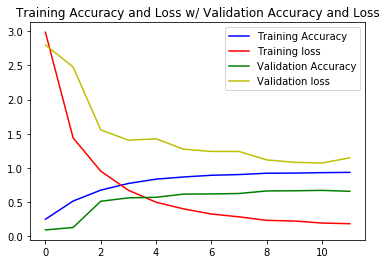

In [36]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training Accuracy and Loss w/ Validation Accuracy and Loss')
plt.legend()
# second run with 540/182 dataset split 237 steps 25 epochs loss: kullback_leibler_divergence optimizer: nadam

### Part 4 - Making a single prediction

In [174]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\User\\Desktop\\Python\\Dataset\\Triangulum Australe.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('orion.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['cygnus','hercules','orion','pegasus']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
print(cnn.predict_generator(test_image))
print(thing[e])

[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
pegasus


In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('hercules.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['cygnus','hercules','orion','pegasus']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
print(cnn.predict_generator(test_image))
print(thing[e])

[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
cygnus


In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('CYGnus.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['sygnus','hercules','orion','pegasus']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
print(cnn.predict_generator(test_image))
print(thing[e])

[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
pegasus


In [20]:
# import numpy as np
# from keras.preprocessing import image

# test_image_luna=image.load_img('sygnus.png',target_size=(64, 64))
# test_image2=image.img_to_array(test_image_luna)
# test_image2=np.expand_dims(test_image2,axis=0)
# luna=cnn.predict(test_image2)

# print(luna)

In [21]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation

# model = Sequential([
#     Dense(10, activation = "relu"),
#     Dense(2, activation = "softmax")])
# model.compile(
#     optimizer = "rmsprop",
#     loss = "sparse_categorical_crossentropy")

# print(model.predict([[1, 2], [1, 3], [1, 1]]))

In [22]:
# model_json = cnn.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# cnn.save_weights("model.h5")
# print("Saved model to disk")